# PROMINENCE "OSPRay NASA Streamlines" example

In [0]:
!pip install prominence

In [0]:
%env PROMINENCE_URL=https://host-130-246-215-158.nubes.stfc.ac.uk/prominence/v1
%env PROMINENCE_OIDC_URL=https://host-130-246-215-158.nubes.stfc.ac.uk

env: PROMINENCE_URL=https://host-130-246-215-158.nubes.stfc.ac.uk/prominence/v1
env: PROMINENCE_OIDC_URL=https://host-130-246-215-158.nubes.stfc.ac.uk


In [0]:
from prominence import auth
from prominence import ProminenceClient

### Obtain a token

In [0]:
client = ProminenceClient()
client.authenticate_user()

To obtain a token, use a web browser to open the page https://host-130-246-215-158.nubes.stfc.ac.uk/device and enter the code 7C3XQ1 when requested


True

### Define and submit a job
Example from http://www.ospray.org/demos.html

In [0]:
# Required resources
resources = {
    'cpus':16,
    'memory':16,
    'disk':10,
    'nodes':1
}

# Define a task
task = {
    'image':'alahiff/ospray',
    'runtime':'singularity',
    'cmd':'/opt/ospray-1.7.1.x86_64.linux/bin/ospBenchmark --file NASA-B-field-sun.osx --renderer scivis -hd --filmic -sg:spp=8 -i NASA'
}

# Output files
output_files = ['NASA.ppm']

# Input files (artifacts)
artifact = {'url':'http://www.sdvis.org/ospray/download/demos/NASA-B-field-sun/NASA-B-field-sun.osx'}

# Create a job
job = {
    'name':'NASAstreamlines',
    'resources':resources,
    'outputFiles':output_files,
    'artifacts':[artifact],
    'tasks':[task]
}

# Submit the job
id = client.create_job(job)
print('Job submitted with id', id)

Job submitted with id 393


### Check job status

In [0]:
client = ProminenceClient()
client.describe_job(393)['status']

'completed'

### Display output image

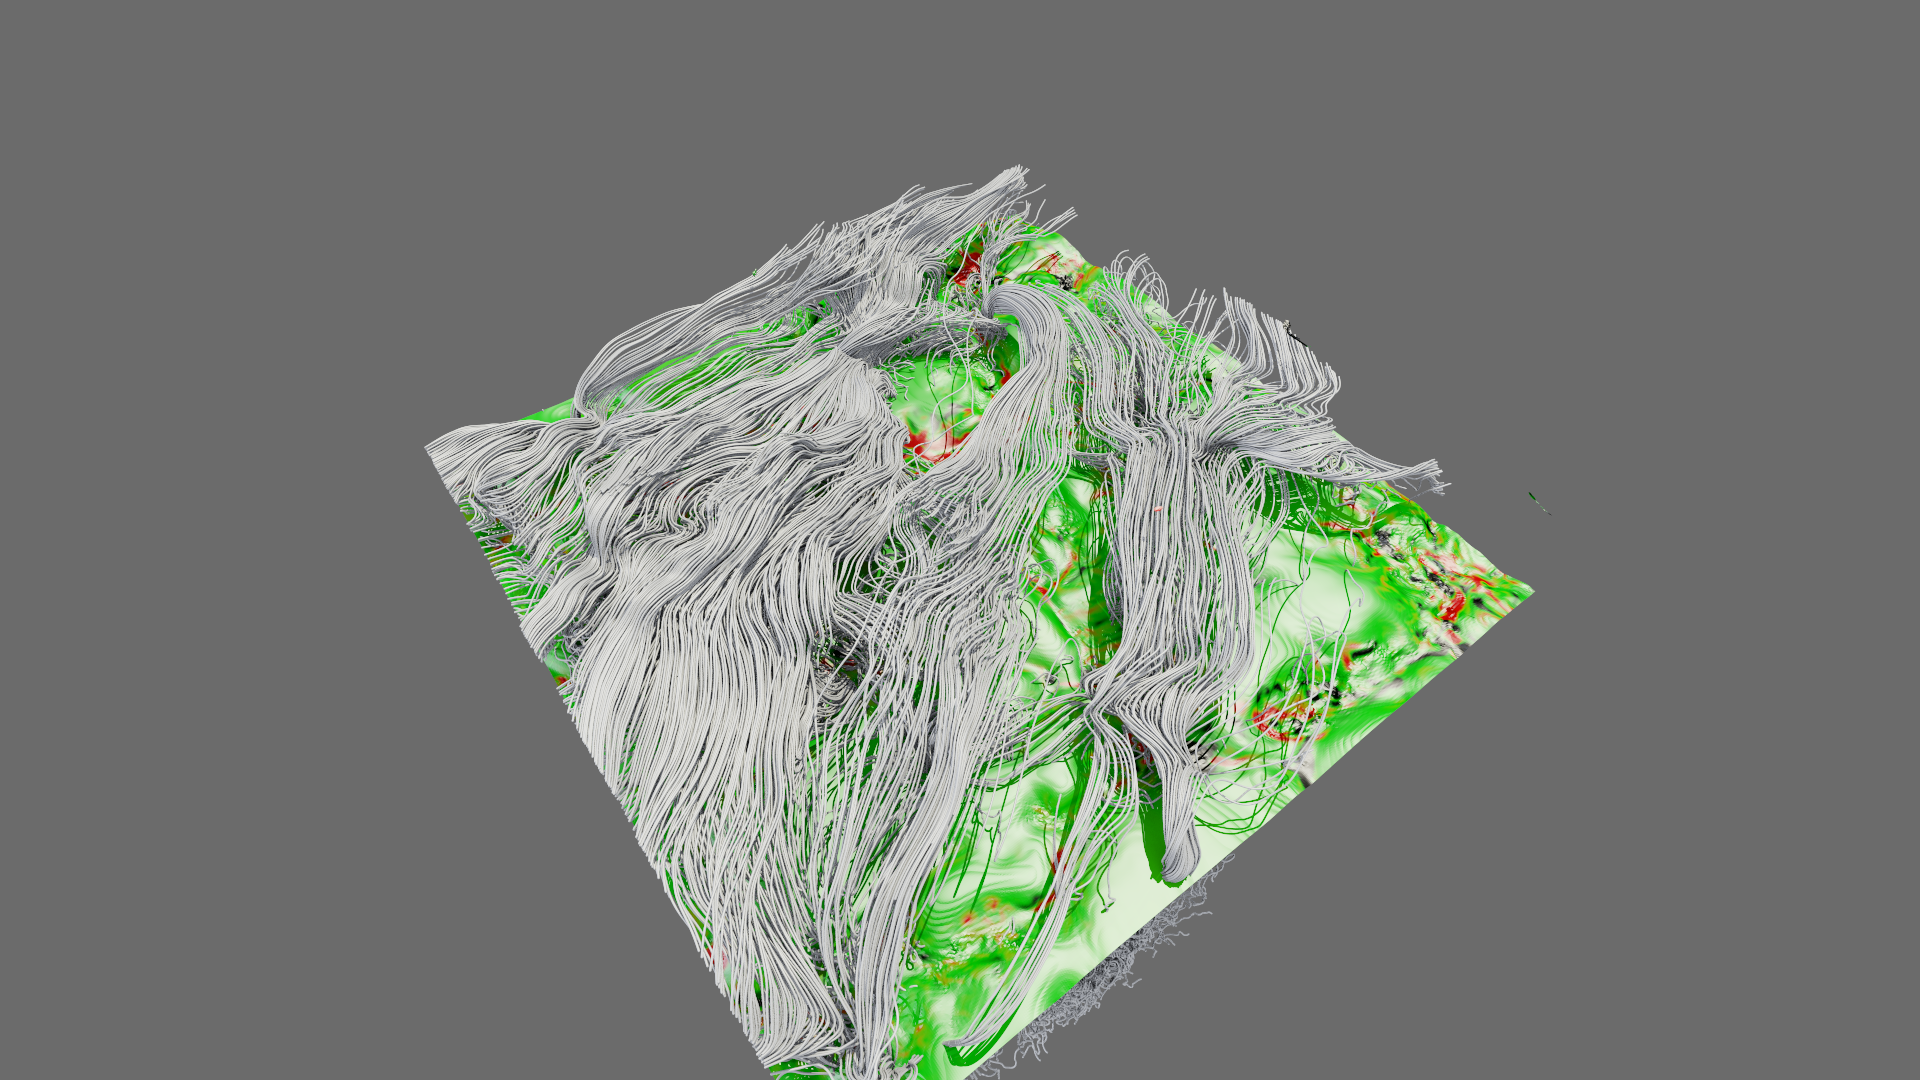

In [0]:
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display

display(Image.open(BytesIO(requests.get(client.describe_job(393)['outputFiles'][0]['url']).content)))
